In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart_database.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [3]:
df.isnull().sum()

age           0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalach      0
 exang        0
 oldpeak      0
 slope        0
 ca           0
 thal         0
 condition    0
dtype: int64

In [4]:
df.duplicated().sum()

0

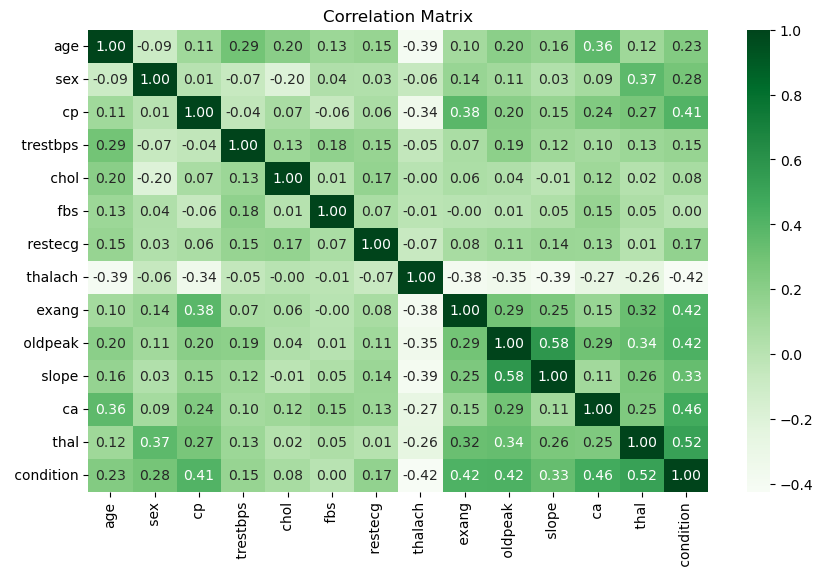

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [6]:
df.columns

Index(['age', ' sex', ' cp', ' trestbps', ' chol', ' fbs', ' restecg',
       ' thalach', ' exang', ' oldpeak', ' slope', ' ca', ' thal',
       ' condition'],
      dtype='object')

In [7]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check again
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

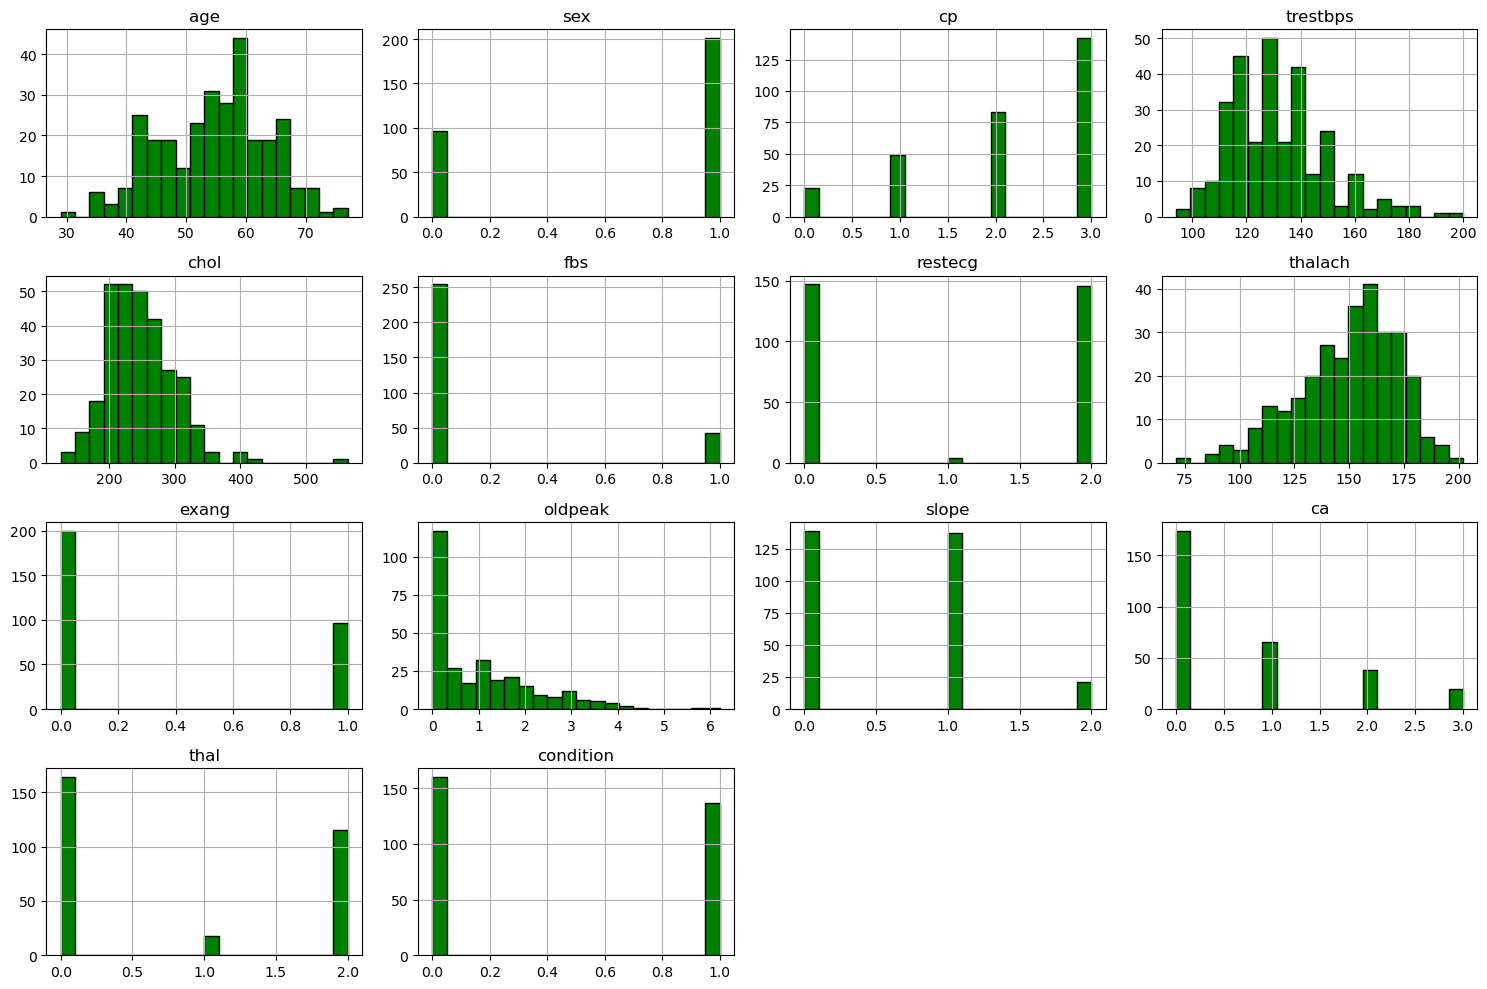

In [8]:
df.hist(figsize=(15, 10), bins=20, color='green', edgecolor='black')
plt.tight_layout()
plt.show()

In [9]:
# Reset index after dropping rows when needed
#df.reset_index(drop=True, inplace=True)

### Preprocessing

In [10]:
# define feature (x) and target (y) variables
# condition: 1 means presence of heart disease, 0 means absence
X= df.drop('condition', axis=1)
y= df['condition']

In [11]:
# One-hot encode categorical variables
# These are categorical: cp, restecg, slope, thal
X= pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2
0,69,1,160,234,1,131,0,0.1,1,1,...,0,0,0,1,0,1,0,1,0,0
1,69,0,140,239,0,151,0,1.8,2,1,...,0,1,0,0,1,0,0,1,0,0
2,66,0,150,226,0,114,0,2.6,0,1,...,0,1,0,0,0,0,1,1,0,0
3,65,1,138,282,1,174,0,1.4,1,1,...,0,0,0,1,0,1,0,1,0,0
4,64,1,110,211,0,144,1,1.8,0,1,...,0,0,0,1,0,1,0,1,0,0


In [12]:
df.shape

(297, 14)

In [13]:
# SCALE FEATURES
scaler = StandardScaler()
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[num_columns] = scaler.fit_transform(X[num_columns])
print('Shape before preprocessing:', df.shape)
print('Shape of X after preprocessing:', X.shape)

Shape before preprocessing: (297, 14)
Shape of X after preprocessing: (297, 22)


In [14]:
X.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2
0,1.600302,1,1.596266,-0.257179,1,-0.812095,0,-0.820813,1,1,...,0,0,0,1,0,1,0,1,0,0
1,1.600302,0,0.468418,-0.160859,0,0.061157,0,0.639470,2,1,...,0,1,0,0,1,0,0,1,0,0
2,1.268242,0,1.032342,-0.411292,0,-1.554358,0,1.326662,0,1,...,0,1,0,0,0,0,1,1,0,0
3,1.157555,1,0.355633,0.667499,1,1.065396,0,0.295874,1,1,...,0,0,0,1,0,1,0,1,0,0
4,1.046868,1,-1.223355,-0.700254,0,-0.244481,1,0.639470,0,1,...,0,0,0,1,0,1,0,1,0,0


### Train Logistic Regression + Random Forest

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (237, 22)
Test set shape: (60, 22)


In [16]:
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

Train target distribution:
 0    0.540084
1    0.459916
Name: condition, dtype: float64
Test target distribution:
 0    0.533333
1    0.466667
Name: condition, dtype: float64


In [17]:
## Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy score on {} model is {:.2f}%'.format(model.__class__.__name__, accuracy))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy score on LogisticRegression model is 91.67%
Confusion Matrix:
[[32  0]
 [ 5 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



In [18]:
## random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf= accuracy_score(y_test, y_pred_rf)*100
print('Accuracy score on {} model is {:.2f}%'.format(rf_model.__class__.__name__, accuracy_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

Accuracy score on RandomForestClassifier model is 85.00%
Confusion Matrix:
[[30  2]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60



## ROC

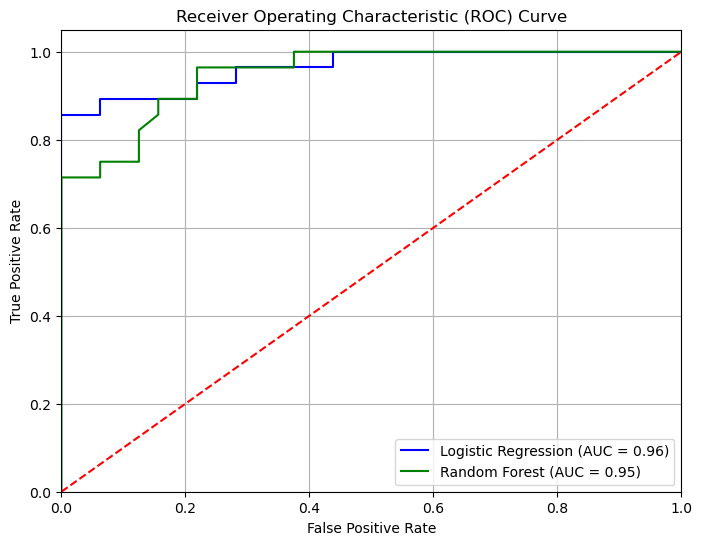

In [19]:
# ROC and AUC for both models
y_pred_prob = rf_model.predict_proba(X_test)[:, 1] #random forest
y_pred_prob_log = model.predict_proba(X_test)[:, 1] #logistic regression

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log))
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Interpret Features

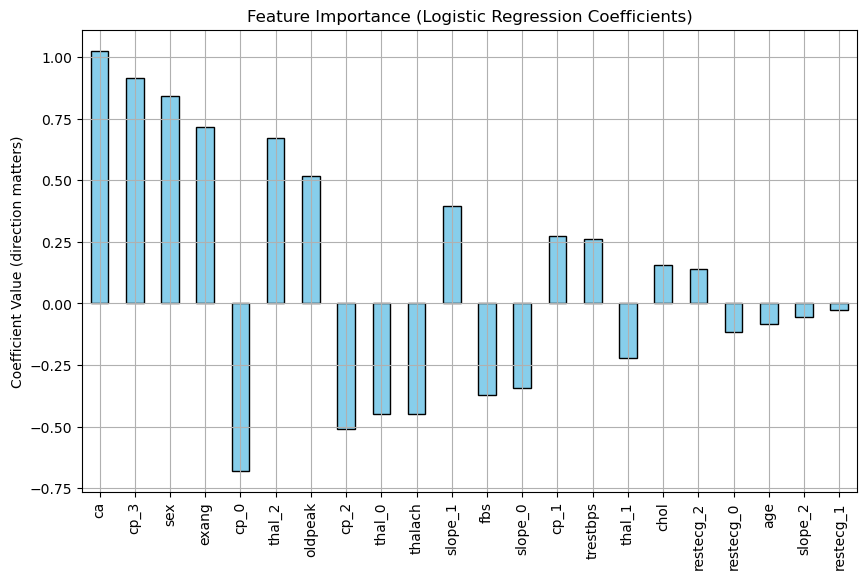

In [20]:
# Create a Series of coefficients
coef_importances = pd.Series(model.coef_[0], index=X_train.columns)
coef_importances = coef_importances.sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(10,6))
coef_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.ylabel('Coefficient Value (direction matters)')
plt.grid(True)
plt.show()

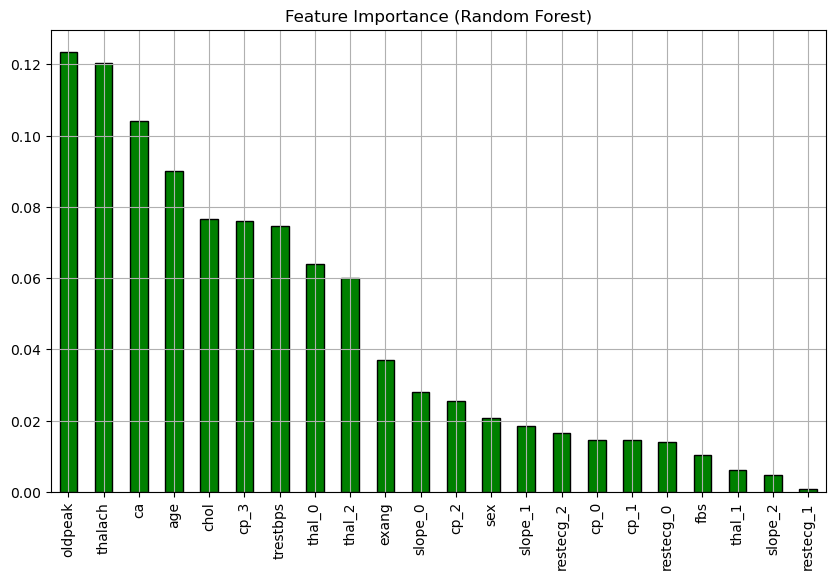

In [21]:
# Feature Importance from Random Forest
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar', color='green', edgecolor='black')
plt.title('Feature Importance (Random Forest)')
plt.grid(True)
plt.show()

In [22]:
top_lr = coef_importances.head(5)
print("Top 5 Logistic Regression features:")
for name, score in top_lr.items():
    print(f"{name}: {score:.2f}")

top_rf= feat_importances.head(5)
print("\nTop 5 Random Forest features:")
for name, score in top_rf.items():
    print(f"{name}: {score:.2f}")

Top 5 Logistic Regression features:
ca: 1.03
cp_3: 0.92
sex: 0.84
exang: 0.72
cp_0: -0.68

Top 5 Random Forest features:
oldpeak: 0.12
thalach: 0.12
ca: 0.10
age: 0.09
chol: 0.08
